In [3]:
# import lib
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons

[5.10702591e-17 1.66533454e-18]


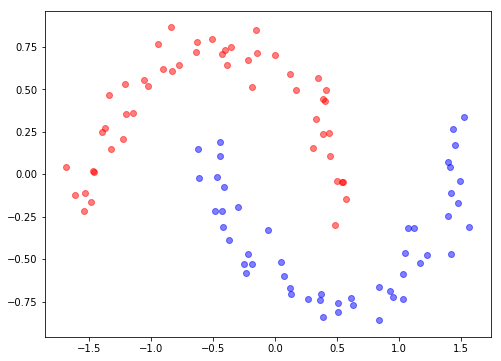

In [39]:
# See the data 
X, y = make_moons(n_samples=100, noise=0.1)
X = X - X.mean(0)
print(X.mean(0))
plt.figure(figsize=(8,6))
plt.scatter(X[y==0, 0], X[y==0, 1], color='red', alpha=0.5)
plt.scatter(X[y==1, 0], X[y==1, 1], color='blue', alpha=0.5)
plt.show()

In [48]:
# traditional
cov = X.T @ X / X.shape[0]
evalue,evector = np.linalg.eig(cov)
idx = np.argsort(evalue)[::-1]
evecs = evector[:,idx]
projected = X @ evecs[:,1]
plt.figure(figsize=(8,6))
plt.scatter(projected[y==0, 0], np.zeros((len(projected),1)), color='red', alpha=0.5)
plt.scatter(projected[y==1, 0], np.zeros((50,1)), color='blue', alpha=0.5)
plt.show()

IndexError: too many indices for array

<Figure size 576x432 with 0 Axes>

In [17]:
# simple method
w = np.random.randn(2,1)
print(np.sqrt(np.sum(w**2)))
w = w/(np.sqrt(np.sum(w**2)))
print(np.sqrt(np.sum(w**2)))
print(w.shape)


1.1259752307649025
1.0
(2, 1)


# Reference 
1. results, P., & Rieble, N. (2016). PCA in numpy and sklearn produces different results. Cross Validated. Retrieved 9 April 2019, from https://stats.stackexchange.com/questions/235882/pca-in-numpy-and-sklearn-produces-different-results
2. 